In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense
from keras.datasets import mnist


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape(((X_test.shape[0], 28*28)))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
input_size = 784
hidden_size = 128
code_size = 64

In [15]:
# Defining the AutoEncoder layers
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

In [12]:
autoencoder = tf.keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.1077
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0883
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0831
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0804
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0785
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0772
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0763
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0756
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0750
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0746


313/313 [==============================] - 2s 6ms/step


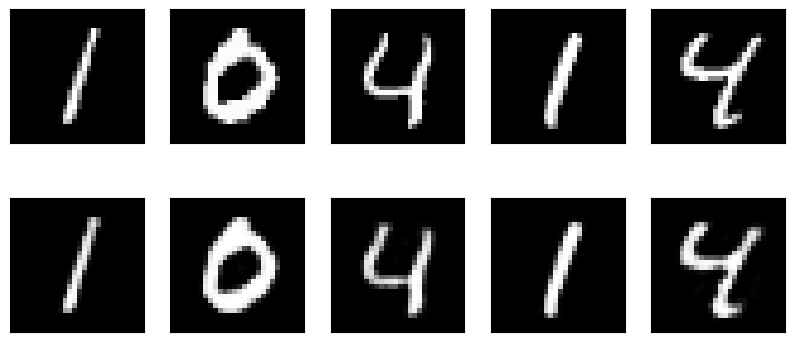

In [16]:
decoded_imgs = autoencoder.predict(X_test)
# number of example digits to show
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
        # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i+2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot reconstruction 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i+2].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Reconstructed Images')
plt.show()